In [10]:
# Importera nödvändiga bibliotek
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
# Funktion för att läsa in data från Excel
def load_data(filepath):
    df = pd.read_excel(filepath, sheet_name="Tabell 1", skiprows=5, engine='openpyxl')
    df.columns = df.columns.str.strip()
    print("Kolumner i filen:", df.columns.tolist())
    expected_columns = ['Utbildningsnamn', 'Utbildningsområde', 'Län']
    for col in expected_columns:
        if col not in df.columns:
            raise KeyError(f"Kolumn '{col}' hittades inte i Excel-filen.")
    df = df.dropna(subset=expected_columns)
    return df


In [12]:
# Funktion för att visa topp 10 värden i en kolumn
def top_10(df, column):
    return df[column].value_counts().head(10)


In [13]:
# Funktion för att plotta stapeldiagram
def plot_bar(data, title, xlabel, ylabel):
    plt.figure(figsize=(10,6))
    data.sort_values().plot(kind='barh', color='skyblue')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()


In [14]:
# Ange sökväg till din Excel-fil här
filepath = "beviljade_program.xlsx"




# Läs in data
df = load_data(filepath)


Kolumner i filen: ['Utbildningsområde', 'Utbildningsnamn', 'Län', 'Kommun', 'Diarienummer', 'Flera kommuner', 'Antal kommuner', 'YH-poäng', 'Utbildningsanordnare administrativ enhet']


In [15]:
import os

filepath = "beviljade_program.xlsx"  # Filen ligger direkt i 'explorations'

print("Absolut sökväg:", os.path.abspath(filepath))
print("Finns filen?", os.path.exists(filepath))
print("Innehåll i aktuell mapp:", os.listdir())  # listar allt i 'explorations'


Absolut sökväg: /Users/mustafahassan/datavisualization_project_group2/explorations/mustafa/beviljade_program.xlsx
Finns filen? True
Innehåll i aktuell mapp: ['mustafa_eda.py', 'mustafa_eda.ipynb', 'beviljade_program.xlsx']


In [16]:
import os
print("Nuvarande arbetskatalog:", os.getcwd())


Nuvarande arbetskatalog: /Users/mustafahassan/datavisualization_project_group2/explorations/mustafa


🔟 Topp 10 utbildningsområden:

Utbildningsområde
Teknik och tillverkning                         75
Samhällsbyggnad och byggteknik                  61
Ekonomi, administration och försäljning         54
Hälso- och sjukvård samt socialt arbete         54
Data/IT                                         42
Kultur, media och design                        16
Lantbruk, djurvård, trädgård, skog och fiske    13
Hotell, restaurang och turism                    8
Transporttjänster                                7
Säkerhetstjänster                                4
Name: count, dtype: int64


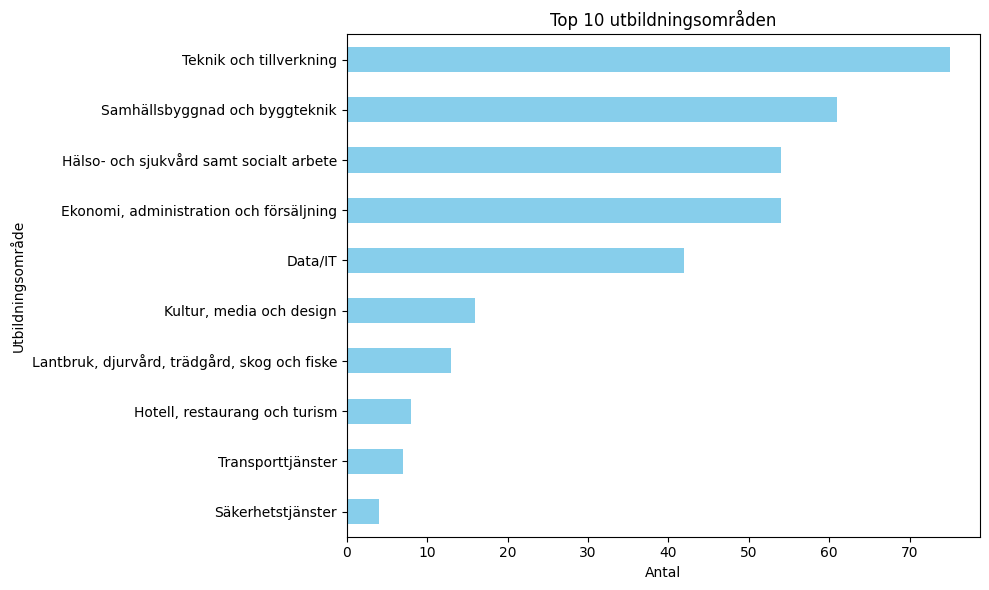

In [17]:
# Visa topp 10 utbildningsområden
top_areas = top_10(df, 'Utbildningsområde')
print("🔟 Topp 10 utbildningsområden:\n")
print(top_areas)

plot_bar(top_areas, "Top 10 utbildningsområden", "Antal", "Utbildningsområde")


🔟 Topp 10 utbildningsnamn:

Utbildningsnamn
Specialistundersköterska inom vård och omsorg av äldre    10
Socialpedagog                                              9
Stödpedagog inom funktionshinderområdet                    7
Byggproduktionsledare                                      4
Tandsköterska                                              4
Medicinsk vårdadministratör                                4
Apotekstekniker                                            4
Produktionstekniker                                        3
Trafiklärare                                               3
Javautvecklare                                             3
Name: count, dtype: int64


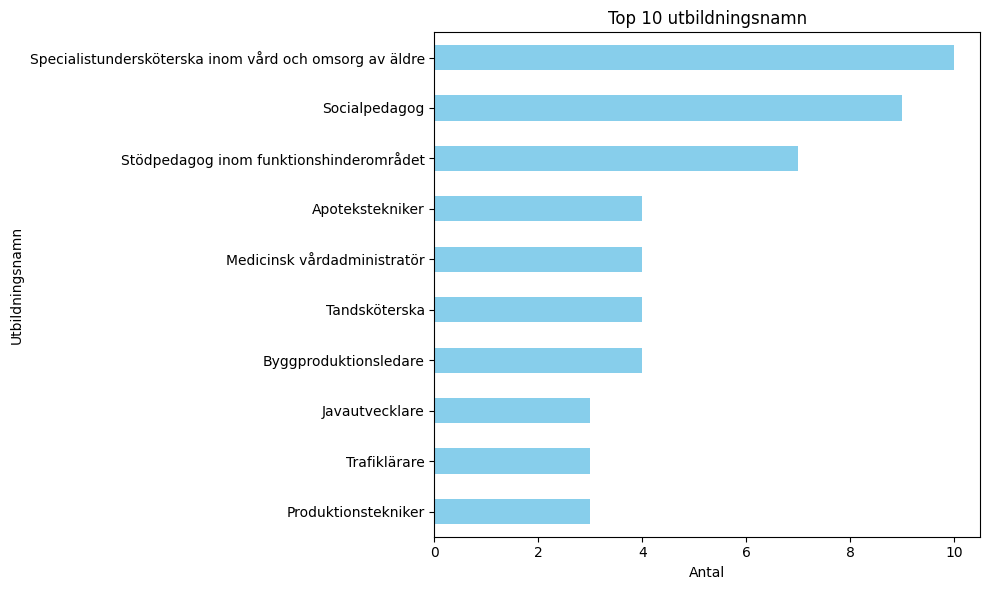

In [18]:
# Visa topp 10 utbildningsnamn
top_names = top_10(df, 'Utbildningsnamn')
print("🔟 Topp 10 utbildningsnamn:\n")
print(top_names)

plot_bar(top_names, "Top 10 utbildningsnamn", "Antal", "Utbildningsnamn")


📍 Antal utbildningar per län:

Län
Stockholm          82
Flera kommuner     65
Västra Götaland    63
Skåne              37
Östergötland       16
Jönköping          13
Örebro             10
Västernorrland      6
Kronoberg           5
Västmanland         5
Name: count, dtype: int64


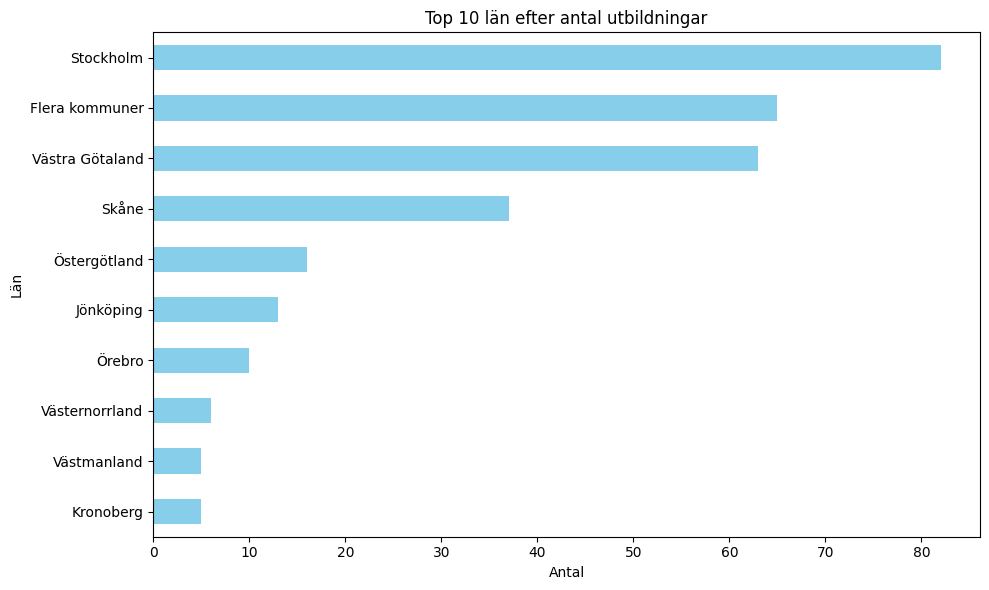

In [19]:
# Visa topp 10 län efter antal utbildningar
top_lan = top_10(df, 'Län')
print("📍 Antal utbildningar per län:\n")
print(top_lan)

plot_bar(top_lan, "Top 10 län efter antal utbildningar", "Antal", "Län")
